In [1]:
import common_implementations as common

In [2]:
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from keras.utils import np_utils
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from glob import glob
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [3]:
common.mount_drive()

Mounted at /content/gdrive


In [4]:
common.drive_atuh_for_dataset_download()

In [5]:
!unzip driver.zip -d '/content/imgs'


Streaming output truncated to the last 5000 lines.
  inflating: /content/imgs/train/c7/img_56699.jpg  
  inflating: /content/imgs/train/c7/img_56717.jpg  
  inflating: /content/imgs/train/c7/img_56724.jpg  
  inflating: /content/imgs/train/c7/img_56768.jpg  
  inflating: /content/imgs/train/c7/img_56779.jpg  
  inflating: /content/imgs/train/c7/img_56849.jpg  
  inflating: /content/imgs/train/c7/img_56899.jpg  
  inflating: /content/imgs/train/c7/img_56938.jpg  
  inflating: /content/imgs/train/c7/img_5706.jpg  
  inflating: /content/imgs/train/c7/img_57076.jpg  
  inflating: /content/imgs/train/c7/img_57122.jpg  
  inflating: /content/imgs/train/c7/img_57137.jpg  
  inflating: /content/imgs/train/c7/img_5715.jpg  
  inflating: /content/imgs/train/c7/img_57278.jpg  
  inflating: /content/imgs/train/c7/img_57321.jpg  
  inflating: /content/imgs/train/c7/img_57345.jpg  
  inflating: /content/imgs/train/c7/img_57355.jpg  
  inflating: /content/imgs/train/c7/img_5741.jpg  
  inflating: /co

In [6]:
!unzip mini_test.zip


Archive:  mini_test.zip
   creating: mini_test/
   creating: mini_test/test/
  inflating: mini_test/test/img_347.jpg  
  inflating: mini_test/test/img_348.jpg  
  inflating: mini_test/test/img_349.jpg  
  inflating: mini_test/test/img_350.jpg  
  inflating: mini_test/test/img_351.jpg  
  inflating: mini_test/test/img_352.jpg  
  inflating: mini_test/test/img_353.jpg  
  inflating: mini_test/test/img_354.jpg  
  inflating: mini_test/test/img_355.jpg  
  inflating: mini_test/test/img_356.jpg  
  inflating: mini_test/test/img_358.jpg  
  inflating: mini_test/test/img_359.jpg  
  inflating: mini_test/test/img_360.jpg  
  inflating: mini_test/test/img_361.jpg  
  inflating: mini_test/test/img_362.jpg  
  inflating: mini_test/test/img_363.jpg  
  inflating: mini_test/test/img_364.jpg  
  inflating: mini_test/test/img_365.jpg  
  inflating: mini_test/test/img_366.jpg  
  inflating: mini_test/test/img_367.jpg  
  inflating: mini_test/test/img_368.jpg  
  inflating: mini_test/test/img_369.jpg  

In [7]:
df=common.data_exploration()

0    c0
1    c0
2    c0
Name: classname, dtype: object
count     22424
unique       10
top          c0
freq       2489
Name: classname, dtype: object

 Image Counts
c0    2489
c2    2317
c1    2267
c4    2326
c6    2325
c5    2312
c3    2346
c8    1911
c7    2002
c9    2129
Name: classname, dtype: int64


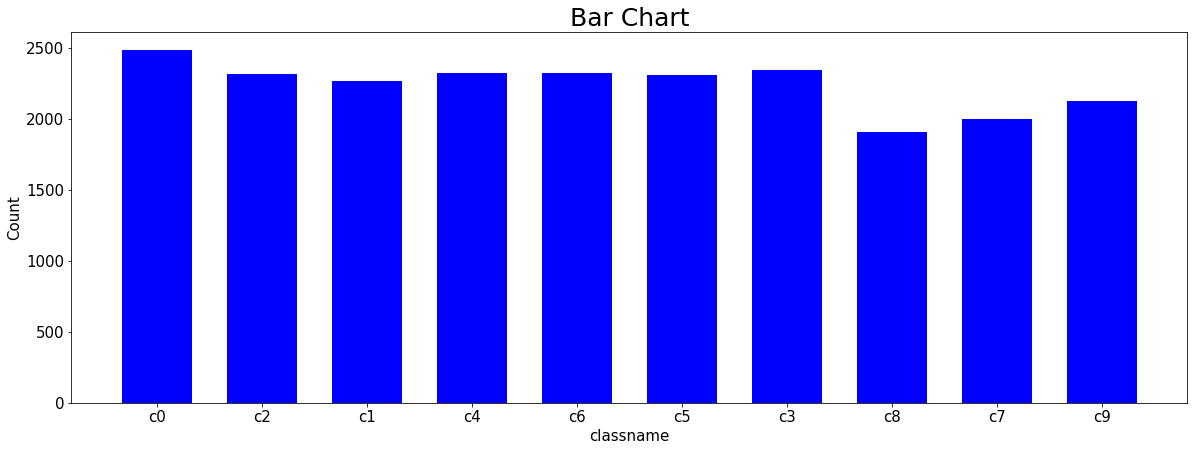

In [8]:
common.data_visualization(df)

In [9]:
common.split_train_val()

In [36]:
batch_size=40
train_generator,val_generator,test_generator=common.image_datagenerator(batch_size=batch_size)

Found 13447 images belonging to 10 classes.
Found 4487 images belonging to 10 classes.
Found 2 images belonging to 1 classes.


In [11]:
from keras.utils import np_utils
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,3), kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         5

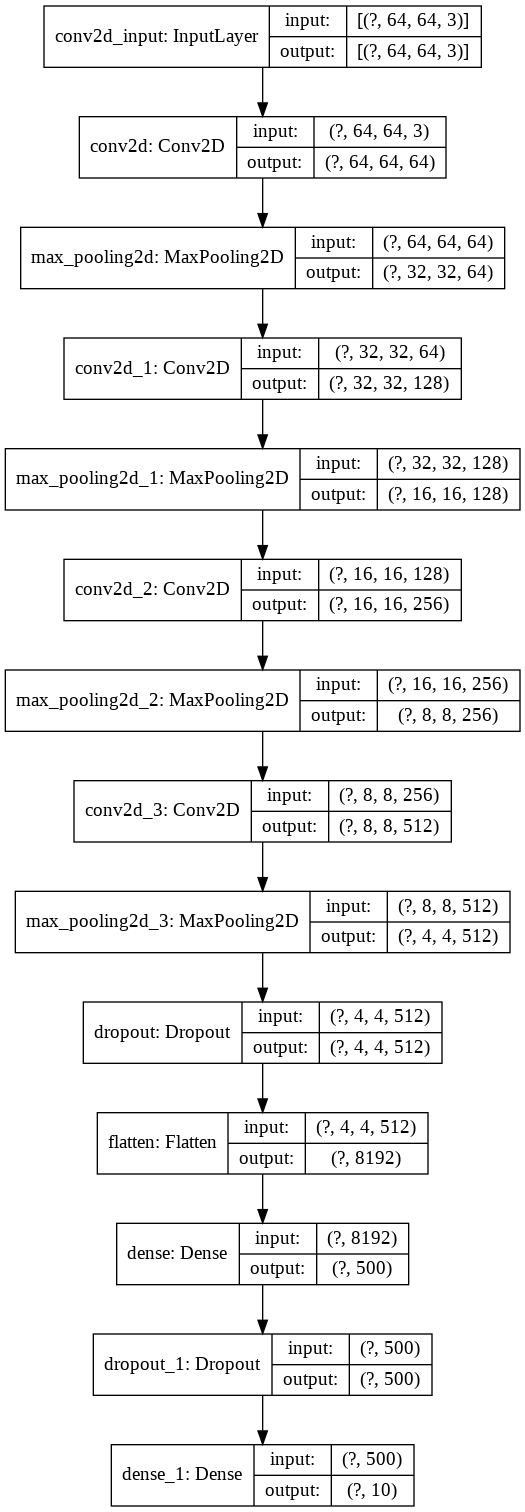

In [12]:
plot_model(model,to_file="model_distracted_driver.png",show_shapes=True,show_layer_names=True)


In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

filepath="/content/gdrive/My Drive/weights/cnn_base_updated_weights.best.from_scratch.hdf5"

checkpoint_callback = ModelCheckpoint(
                        filepath,
                        monitor='val_accuracy',
                        verbose=1,
                        save_best_only=True,
                        mode='max')

early_stop_callback = EarlyStopping(
                monitor='val_accuracy',
                # verbose=0, # decides what to print
                # min_delta=0, # threshold to whether quantify a loss at some epoch as improvement or not. If the difference of loss is below min_delta, it is quantified as no improvement
                # mode='auto', # depends on the direction of the monitored quantity (is it supposed to be decreasing or increasing), since we monitor the loss, we can use min.        
                patience=3,
                mode='max') 

callbacks_list = [checkpoint_callback, early_stop_callback]

In [ ]:
from math import ceil
fit_output = model.fit(
            train_generator,
            steps_per_epoch=ceil(len(train_generator.filenames) // batch_size),
            epochs=25,
            validation_data=val_generator,
            validation_steps=ceil(len(val_generator.filenames) // batch_size),
            callbacks=callbacks_list)

Epoch 1/25
336/336 [==============================] - ETA: 0s - loss: 2.4896 - accuracy: 0.0938
Epoch 00001: val_accuracy improved from -inf to 0.11116, saving model to /content/gdrive/My Drive/weights/cnn_base_updated_weights.best.from_scratch.hdf5
336/336 [==============================] - 380s 1s/step - loss: 2.4896 - accuracy: 0.0938 - val_loss: 2.3228 - val_accuracy: 0.1112
Epoch 2/25
336/336 [==============================] - ETA: 0s - loss: 2.2656 - accuracy: 0.1574
Epoch 00002: val_accuracy improved from 0.11116 to 0.20804, saving model to /content/gdrive/My Drive/weights/cnn_base_updated_weights.best.from_scratch.hdf5
336/336 [==============================] - 378s 1s/step - loss: 2.2656 - accuracy: 0.1574 - val_loss: 2.1169 - val_accuracy: 0.2080
Epoch 3/25
336/336 [==============================] - ETA: 0s - loss: 1.8321 - accuracy: 0.3120
Epoch 00003: val_accuracy improved from 0.20804 to 0.41272, saving model to /content/gdrive/My Drive/weights/cnn_base_updated_weights.bes

In [15]:
model.load_weights('/content/gdrive/My Drive/weights/cnn_base_updated_weights.best.from_scratch.hdf5')


TypeError: ignored

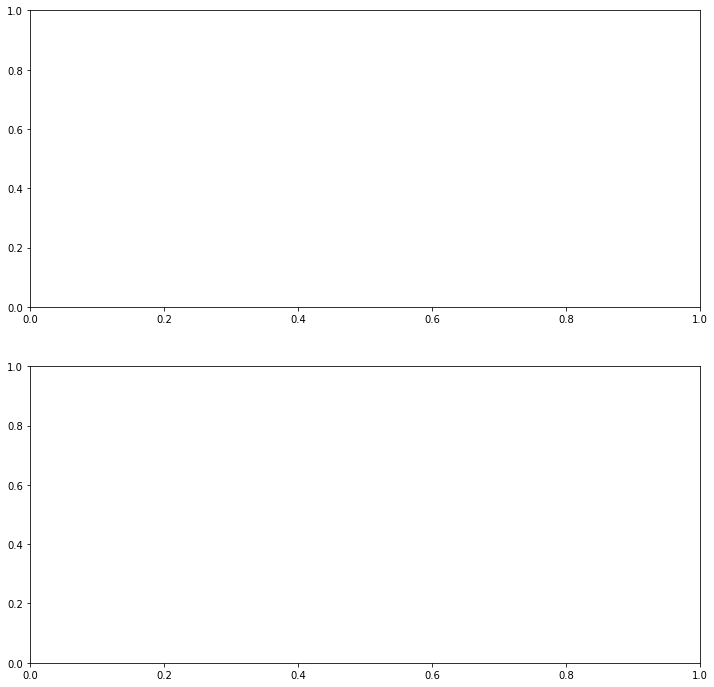

In [20]:
common.print_accuracy_plots(fit_output)

In [16]:
class_names = list()
for name,idx in df['classname'].value_counts(sort=False).items():
    class_names.append(name)
ypred = model.predict(val_generator)

In [17]:
val_label=common.return_validator_labels(val_generator,batch_size)

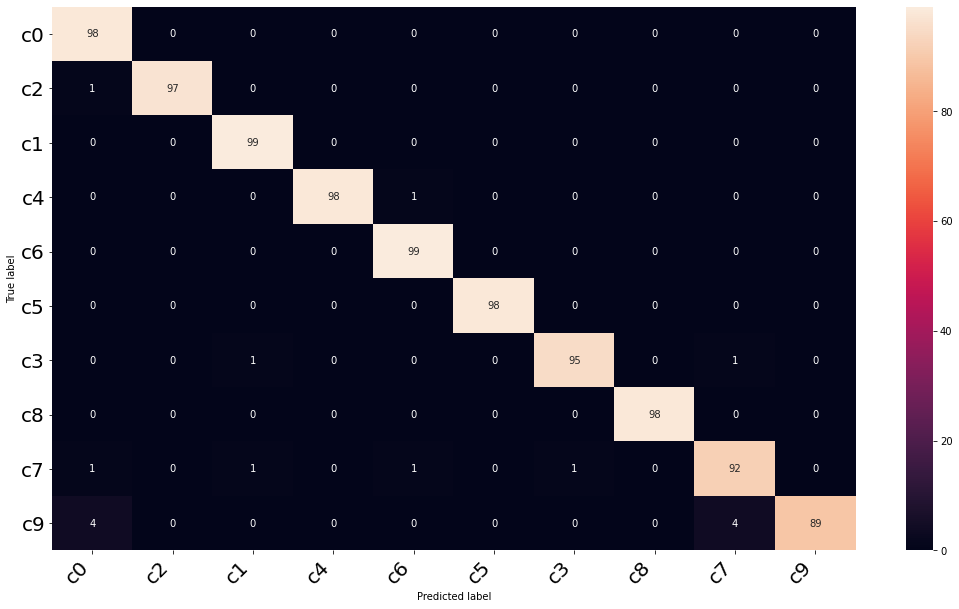

In [18]:
common.print_heatmap(val_label,ypred,class_names)


In [19]:
common.print_metrics(ypred,val_label)

Accuracy: 0.968576
Precision: 0.969398
Recall: 0.968576
F1 score: 0.968561


In [ ]:
model.load_weights('/content/gdrive/My Drive/weights/cnn_base_updated_weights.best.from_scratch.hdf5')


In [37]:
predictions = model.predict(test_generator)


mkdir: cannot create directory ‘mini_test’: File exists


In [38]:
subm = np.column_stack((np.asarray(test_generator.filenames), np.asarray(predictions,dtype=np.float32)))


In [40]:
print(subm[0:2])


[['test/img_347.jpg' '0.35074466' '0.00011039201' '5.22167e-07'
  '0.4556382' '0.18519326' '0.001788494' '4.681374e-06' '0.00014338912'
  '0.0009521456' '0.0054242546']
 ['test/img_352.jpg' '6.710377e-07' '5.9534186e-06' '1.2068194e-05'
  '1.8340461e-07' '2.8363397e-06' '7.456102e-06' '1.8005923e-05'
  '0.9998215' '0.00012588355' '5.638648e-06']]


In [24]:
np.savetxt('/content/gdrive/My Drive/cnn_updated_base_outputs.csv',subm, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0-safe,c1-text-right,c2-talking-phone-right,c3-text-left,c4-talking-phone-left,c5-radio-operating,c6-drinking,c7-reching-behind,c8-hair-makeup,c9-talking-passenger')


In [65]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_shape = [64,64,3],include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [66]:
train_vgg16 = model.predict(train_generator,verbose=1)
valid_vgg16 = model.predict(val_generator,verbose=1)

113/113 [==============================] - 25s 218ms/step


In [67]:
print("Train shape",train_vgg16.shape)
print("Validation shape",valid_vgg16.shape)

Train shape (13447, 2, 2, 512)
Validation shape (4487, 2, 2, 512)


In [68]:
train_features = train_vgg16[0]
valid_features = valid_vgg16[0]

In [69]:
print("Train features shape",train_features.shape)
print("Validation features shape",valid_features.shape)

Train features shape (2, 2, 512)
Validation features shape (2, 2, 512)


In [76]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

# load model without classifier layers
vgg16_model = VGG16(include_top=False, input_shape=(64, 64, 3))
# add new classifier layers
flat1 = Flatten()(vgg16_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
vgg16_model = Model(inputs=vgg16_model.inputs, outputs=output)
# summarize
vgg16_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)      

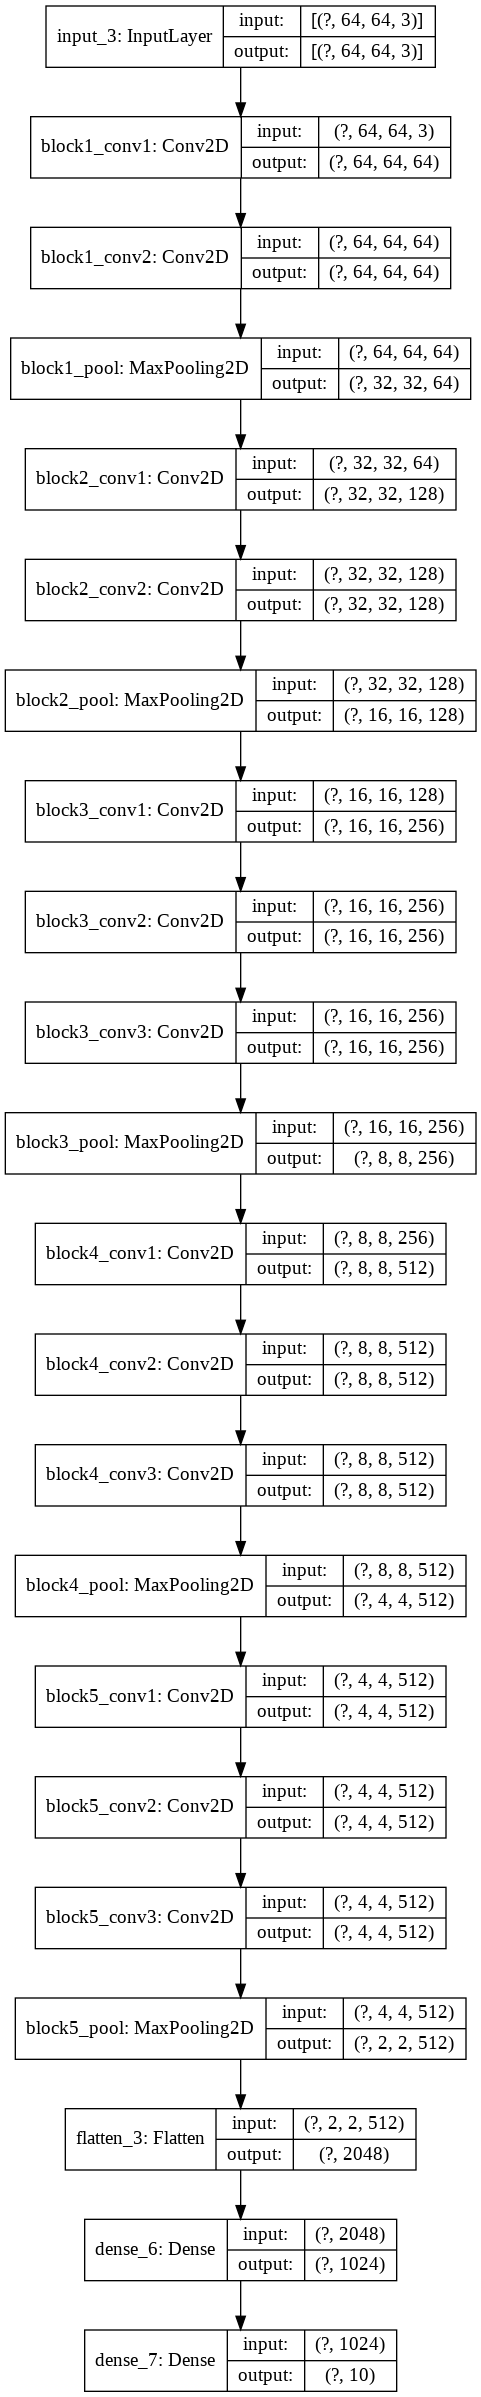

In [77]:
vgg16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
plot_model(vgg16_model,to_file="model_distracted_driver_vgg16_extraction.png",show_shapes=True,show_layer_names=True)

In [72]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

filepath="/content/gdrive/My Drive/weights/vgg16_updated_imagedatagen_updated_weights.best.from_scratch.hdf5"

checkpoint_callback = ModelCheckpoint(
                        filepath,
                        monitor='val_accuracy',
                        verbose=1,
                        save_best_only=True,
                        mode='max')

early_stop_callback = EarlyStopping(
                monitor='val_accuracy',
                # verbose=0, # decides what to print
                # min_delta=0, # threshold to whether quantify a loss at some epoch as improvement or not. If the difference of loss is below min_delta, it is quantified as no improvement
                # mode='auto', # depends on the direction of the monitored quantity (is it supposed to be decreasing or increasing), since we monitor the loss, we can use min.        
                patience=3,
                mode='max') 

callbacks_list = [checkpoint_callback, early_stop_callback]

In [51]:
callbacks_list

In [78]:
from math import ceil



fit_output_vgg = vgg16_model.fit(train_generator,
            steps_per_epoch=ceil(len(train_generator.filenames) // batch_size),
            epochs=25,
            validation_data=(valid_vgg16,val_generator),
            validation_steps=ceil(len(val_generator.filenames) // batch_size),
            callbacks=callbacks_list)

Epoch 1/25
129/336 [==========>...................] - ETA: 51s - loss: 112565.3516 - accuracy: 0.0474

KeyboardInterrupt: ignored

In [58]:
train_vgg16.shape

(13447, 2, 2, 512)

AttributeError: ignored